# F1 Analysis

In [1]:
import fastf1.core
# import the dependencies
import pandas as pd
import numpy as np
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Enable cache and setup plotting
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [3]:
# Load the session
race = ff1.get_session(2023, 'Zandvoort', 'R')
race.load(laps=True, telemetry=True, weather=False, messages=False)

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']


In [4]:
laps = race.laps.pick_lap(7)
print(laps.columns)
drivers = pd.unique(laps['Driver'])
compounds = pd.unique(laps['Compound'])
print(compounds)
compounds = ['SOFT', 'INTERMEDIATE']
driver_laps: dict[str, fastf1.core.Lap] = {driver: laps.pick_driver(driver) for driver in drivers}
compound_laps: dict[str, fastf1.core.Lap] = {compound: laps.pick_tyre(compound) for compound in compounds}

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')
['INTERMEDIATE' 'SOFT']


In [5]:
fastest_compound_laps = {compound: laps.pick_fastest() for compound, laps in compound_laps.items()}
compound_telemetry = {compound: lap.get_car_data().add_distance() for compound, lap in fastest_compound_laps.items()}

for compound, telemetry in compound_telemetry.items():
    telemetry['Driver'] = fastest_compound_laps[compound]['Driver']

for compound, telemetry in compound_telemetry.items():
    telemetry['Brake'] = telemetry['Brake'].astype(float)

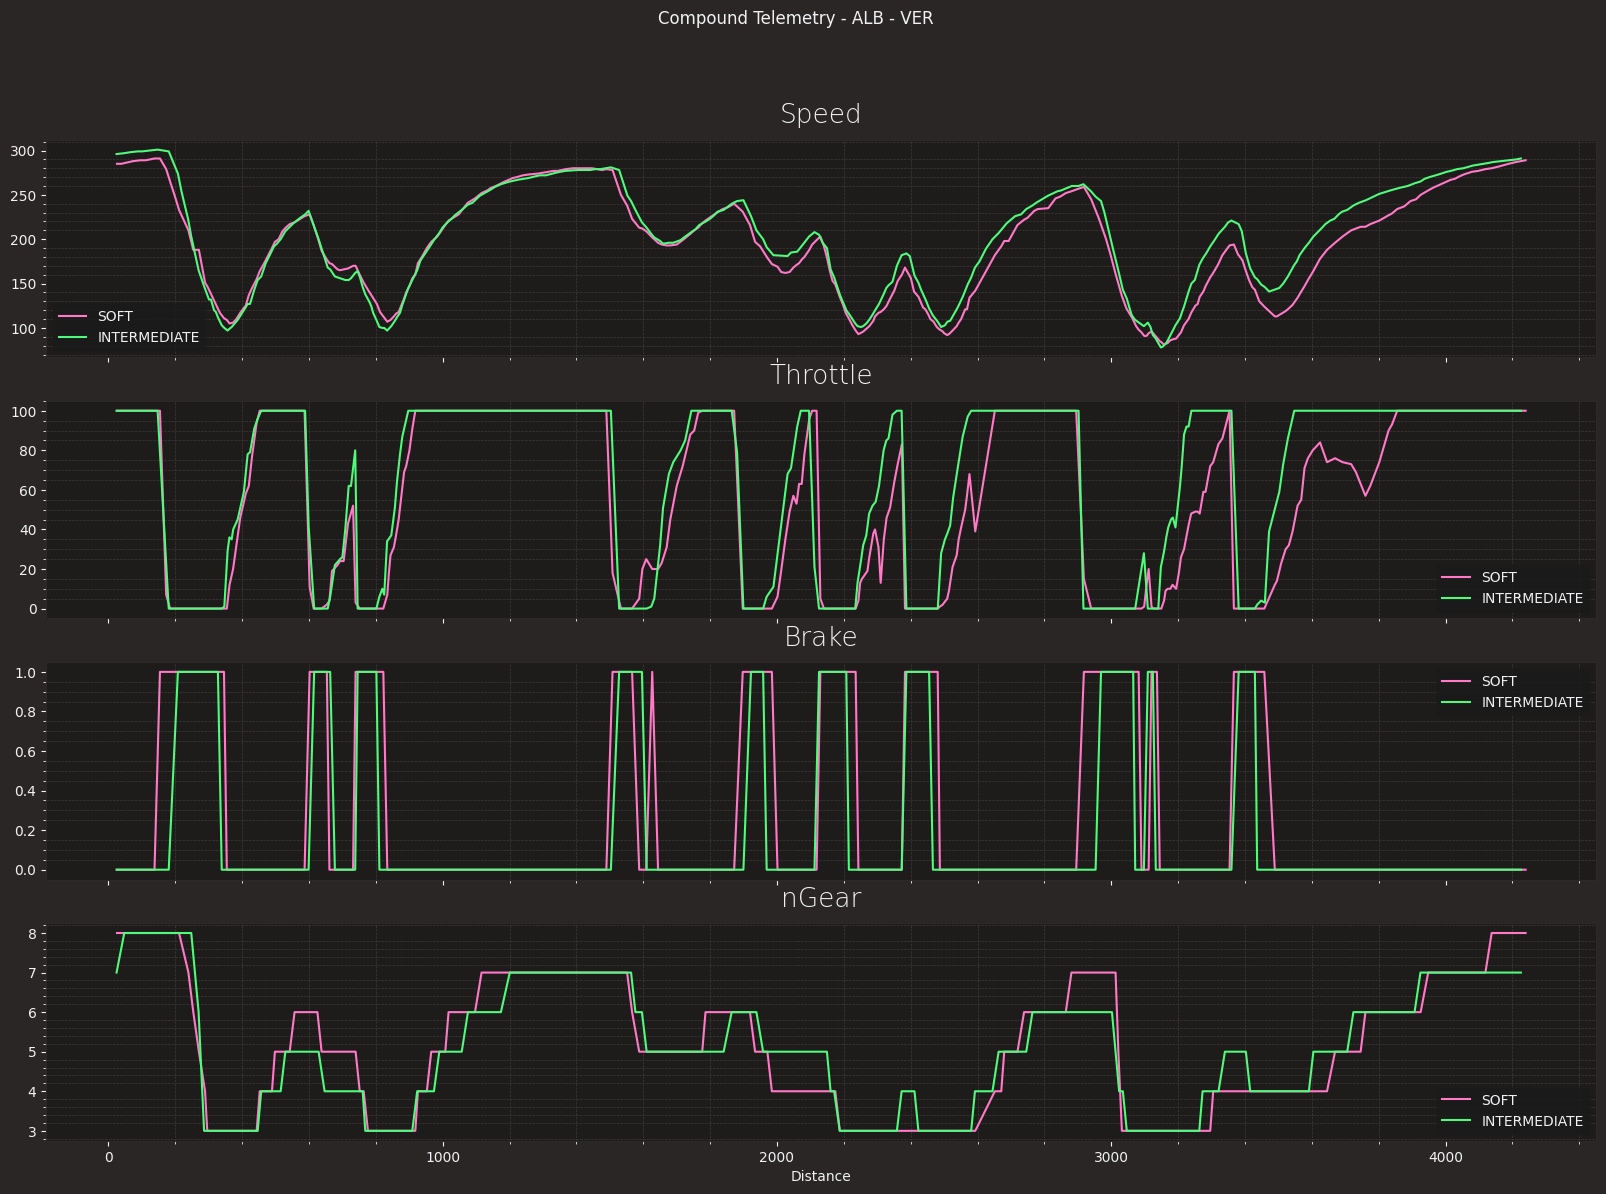

In [15]:
metrics = ['Speed', 'Throttle', 'Brake', 'nGear']
fig, ax = plt.subplots(len(metrics), figsize=(20, 13))
fig.suptitle(f"Compound Telemetry - {fastest_compound_laps['SOFT']['Driver']} - {fastest_compound_laps['INTERMEDIATE']['Driver']}")

for i in range(len(metrics)):
    ax[i].set_title(f"{metrics[i]}")
    for compound in compounds:
        compound_telemetry[compound].plot(x='Distance', y=metrics[i], ax=ax[i], label=compound)
    ax[i].legend()

for a in ax.flat:
    a.label_outer()
    
plt.show()